In [ ]:
#all_slow

# Running Experiments
> A quick walkthrough on running experiments as designed in this library.

In [ ]:
#hide
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#hide
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [ ]:
from lemonade.setup import *
from lemonade.experiment import *
from fastai.imports import *

**Note: This assumes you have run the previous 'quick walkthrough' and have the 1K dataset setup and pre-processed.**
- Copy the 2 experiment template directories in the `templates` folder to your `EXPERIMENT_STORE`
    - `lstm_base` directory
    - `cnn_base` directory
- The resulting directory structure must be as shown below

In [ ]:
EXPERIMENT_STORE

'/home/vinod/.lemonade/experiments'

In [ ]:
os.listdir(EXPERIMENT_STORE)

['cnn_base', 'lstm_base']

In [ ]:
os.listdir(f'{EXPERIMENT_STORE}/cnn_base')

['cnn_base.experiment', 'experiment.yaml']

Update both the `experiment.yaml` files, enter the correct path for the following 3 ...
```yaml
path: #update this to absolute path of EXPERIMENT_STORE (e.g. '/home/vinod/.lemonade/experiments')
checkpoint_path: #update this to absolute path of MODEL_STORE (e.g. '/home/vinod/.lemonade/models')
dataset_path: #update this to absolute path of dataset (e.g. '/home/vinod/.lemonade/datasets/synthea/1K')  
```

## LSTM

In [ ]:
lstm_base = Experiment.create_from_file(EXPERIMENT_STORE, 'lstm_base')

Print out basic details of the experiment config

In [ ]:
lstm_base 

Experiment name: lstm_base
Description: Baseline settings for EHR_LSTM experiments
Path: /home/vinod/.lemonade/experiments/lstm_base
Labels: ['diabetes', 'stroke', 'alzheimers', 'coronaryheart']
Dataset: /home/vinod/.lemonade/datasets/synthea/1K
Model: LSTM
Optim: Adagrad

Run fit with default settings

epoch |     train loss |     train aurocs                  valid loss |     valid aurocs    
----------------------------------------------------------------------------------------------------
    0 |         10.791 | [0.486 0.496 0.545 0.566]              1.366 | [0.987 0.848 0.693 0.759]
    2 |          0.971 | [0.941 0.728 0.690 0.886]              1.067 | [0.953 0.822 0.696 0.741]
    4 |          0.926 | [0.929 0.802 0.738 0.857]              0.988 | [0.974 0.818 0.701 0.736]
    6 |          0.717 | [0.980 0.820 0.822 0.910]              1.121 | [0.962 0.817 0.701 0.728]
    9 |          0.553 | [0.980 0.905 0.918 0.943]              1.510 | [0.962 0.803 0.693 0.714]
Checkpointed to "/home/vinod/.lemonade/models/lstm_base/checkpoint.tar"
Saved experiment to /home/vinod/.lemonade/experiments/lstm_base/lstm_base.experiment


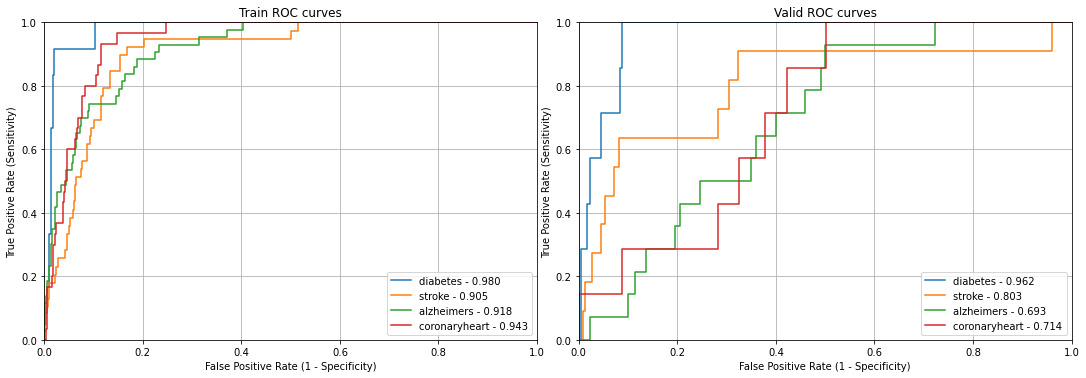

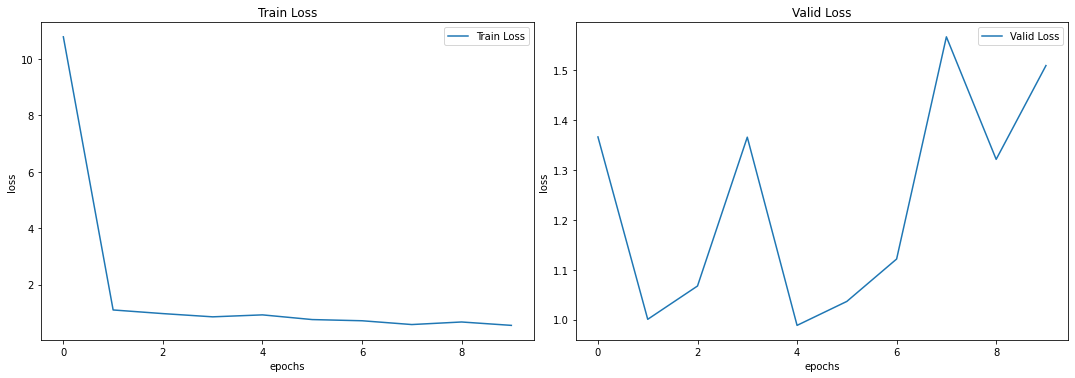

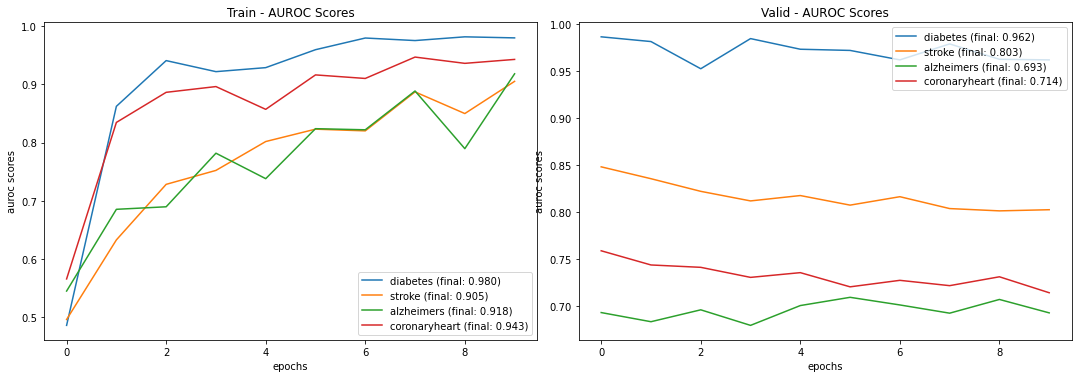

In [ ]:
lstm_base.fit(10, verbosity=.5)

Load the saved experiment run again + load model from checkpoint ..

In [ ]:
lstm_base_exp = Experiment.load('lstm_base')

Loaded experiment from /home/vinod/.lemonade/experiments/lstm_base/lstm_base.experiment


From "/home/vinod/.lemonade/models/lstm_base/checkpoint.tar", loading model ...
loading optimizer and epoch_index ...
epoch |     train loss |     train aurocs                  valid loss |     valid aurocs    
----------------------------------------------------------------------------------------------------
   10 |          0.530 | [0.977 0.904 0.930 0.949]              1.724 | [0.969 0.797 0.681 0.715]
   12 |          0.479 | [0.976 0.926 0.946 0.970]              1.634 | [0.950 0.789 0.677 0.712]
   14 |          0.484 | [0.979 0.940 0.923 0.969]              2.354 | [0.936 0.795 0.653 0.717]
Checkpointed to "/home/vinod/.lemonade/models/lstm_base/checkpoint.tar"
Saved experiment to /home/vinod/.lemonade/experiments/lstm_base/lstm_base.experiment


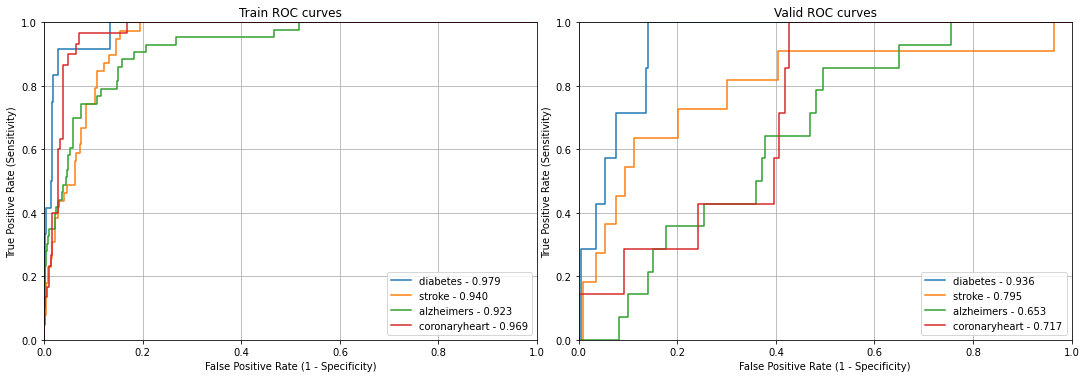

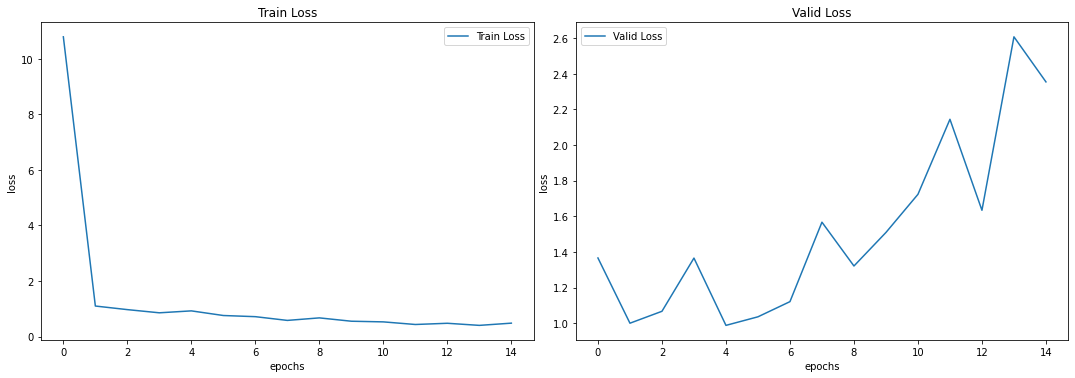

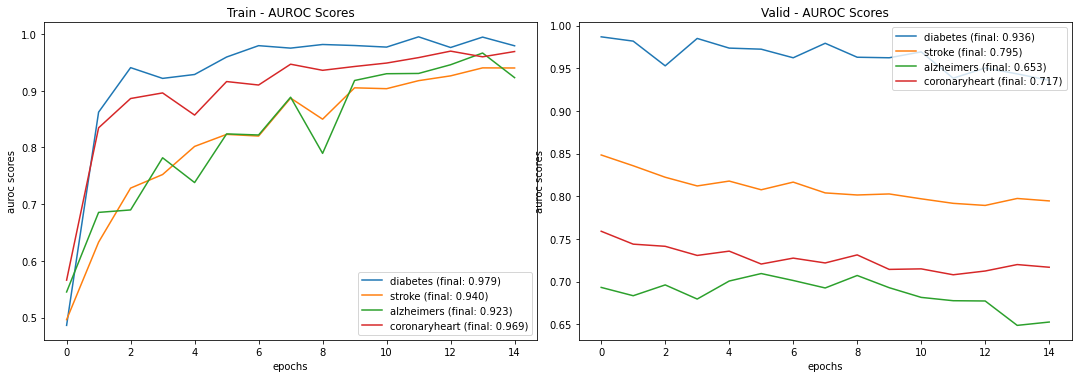

In [ ]:
lstm_base.fit(5, from_checkpoint=True)

Run predict on the test dataset

From "/home/vinod/.lemonade/models/lstm_base/checkpoint.tar", loading model ...
test loss = 1.8470971584320068
test aurocs = [0.842067 0.77638  0.748782 0.924513]

Prediction Summary ...
               auroc_score  optimal_threshold     auroc_95_ci
diabetes          0.842067           0.059897  (0.685, 0.953)
stroke            0.776380           0.242704  (0.644, 0.892)
alzheimers        0.748782           0.161707  (0.633, 0.848)
coronaryheart     0.924513           0.436936  (0.846, 0.978)
Saved experiment to /home/vinod/.lemonade/experiments/lstm_base/lstm_base.experiment


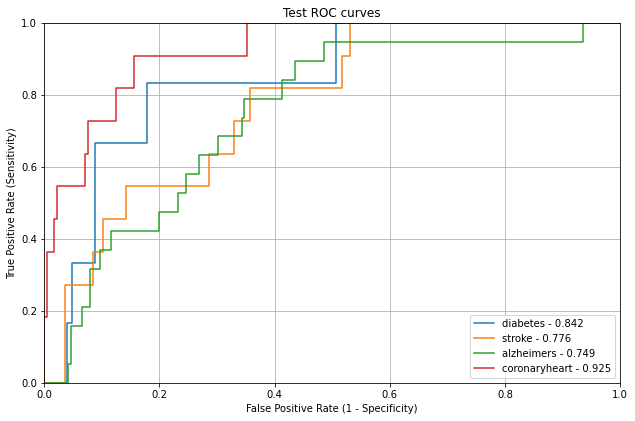

In [ ]:
lstm_base.predict()

## CNN

In [ ]:
cnn_base = Experiment.create_from_file(EXPERIMENT_STORE, 'cnn_base')

In [ ]:
cnn_base

Experiment name: cnn_base
Description: Baseline settings for EHR_CNN experiments
Path: /home/vinod/.lemonade/experiments/cnn_base
Labels: ['diabetes', 'stroke', 'alzheimers', 'coronaryheart']
Dataset: /home/vinod/.lemonade/datasets/synthea/1K
Model: CNN
Optim: Adagrad

epoch |     train loss |     train aurocs                  valid loss |     valid aurocs    
----------------------------------------------------------------------------------------------------
    0 |          7.646 | [0.566 0.445 0.543 0.518]             15.201 | [0.887 0.785 0.644 0.650]
    9 |          1.164 | [0.909 0.651 0.762 0.831]              1.299 | [0.955 0.777 0.615 0.691]
Checkpointed to "/home/vinod/.lemonade/models/cnn_base/checkpoint.tar"
Saved experiment to /home/vinod/.lemonade/experiments/cnn_base/cnn_base.experiment


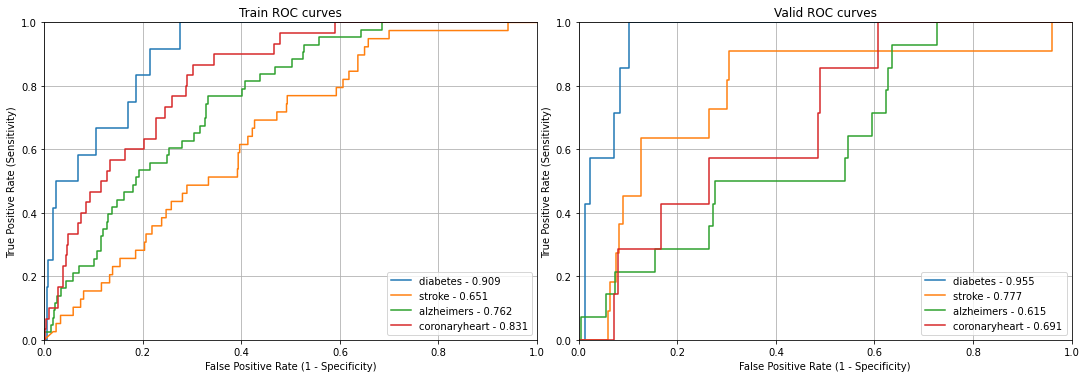

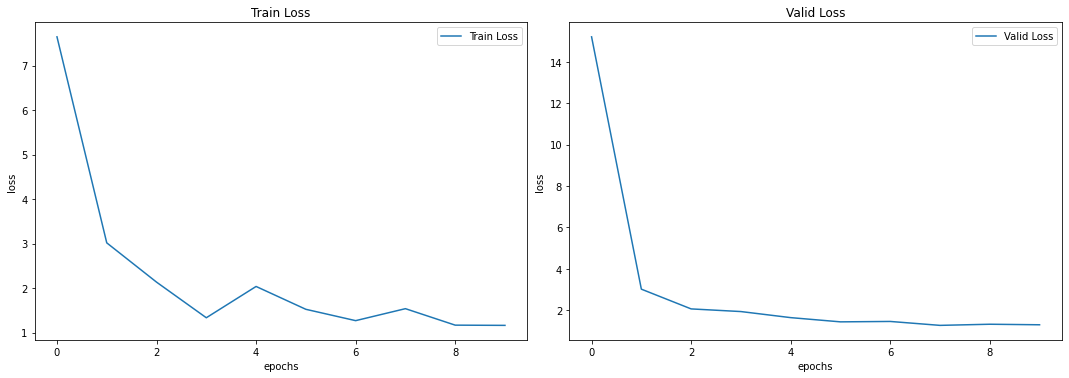

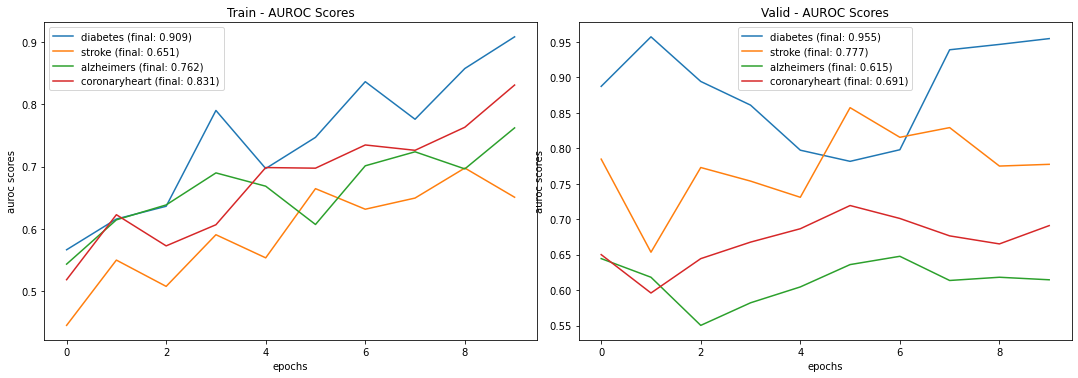

In [ ]:
cnn_base.fit(10, verbosity=.25)

From "/home/vinod/.lemonade/models/cnn_base/checkpoint.tar", loading model ...
loading optimizer and epoch_index ...
epoch |     train loss |     train aurocs                  valid loss |     valid aurocs    
----------------------------------------------------------------------------------------------------
   10 |          1.098 | [0.875 0.659 0.769 0.802]              1.914 | [0.927 0.809 0.632 0.742]
   12 |          0.997 | [0.935 0.748 0.760 0.840]              1.370 | [0.913 0.819 0.669 0.787]
   14 |          0.987 | [0.929 0.738 0.793 0.860]              1.092 | [0.950 0.885 0.631 0.748]
Checkpointed to "/home/vinod/.lemonade/models/cnn_base/checkpoint.tar"
Saved experiment to /home/vinod/.lemonade/experiments/cnn_base/cnn_base.experiment


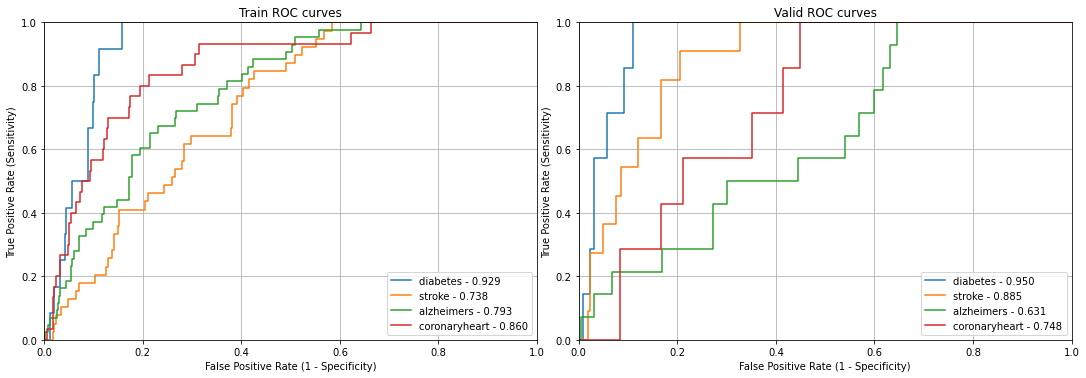

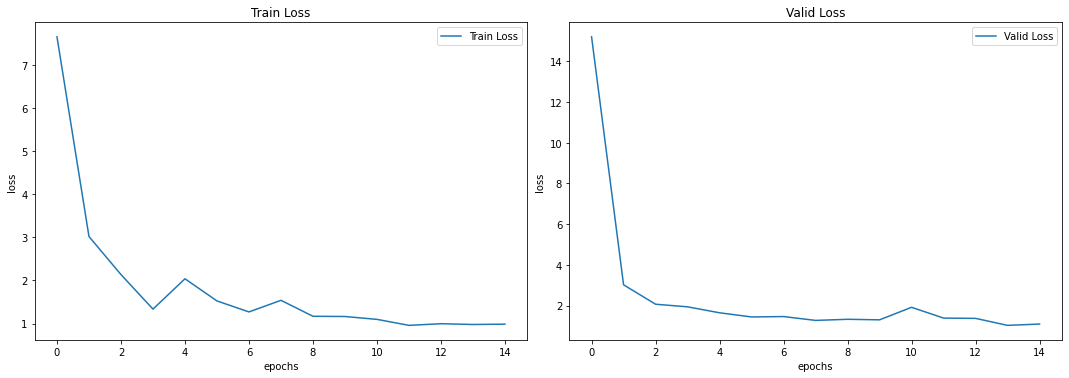

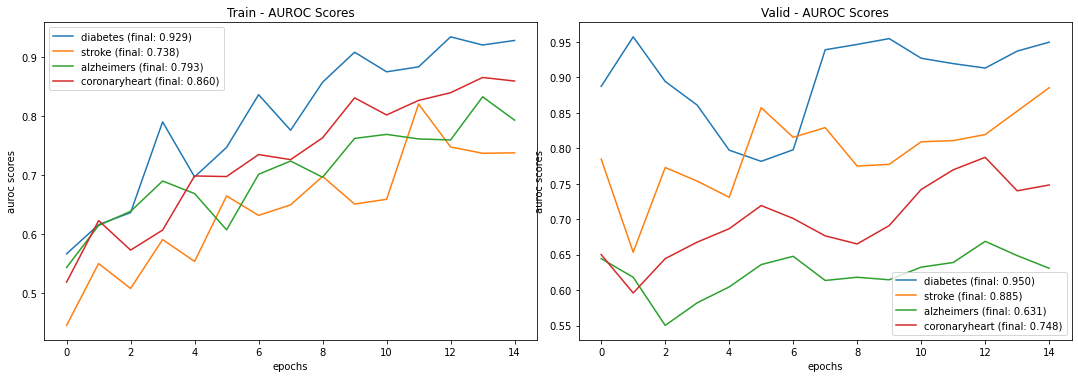

In [ ]:
cnn_base.fit(5, from_checkpoint=True)

From "/home/vinod/.lemonade/models/cnn_base/checkpoint.tar", loading model ...
test loss = 1.0259963274002075
test aurocs = [0.903202 0.793425 0.766326 0.887175]

Prediction Summary ...
               auroc_score  optimal_threshold     auroc_95_ci
diabetes          0.903202           0.267579  (0.849, 0.953)
stroke            0.793425           0.820540   (0.64, 0.914)
alzheimers        0.766326           0.780040  (0.666, 0.851)
coronaryheart     0.887175           0.755097  (0.768, 0.972)
Saved experiment to /home/vinod/.lemonade/experiments/cnn_base/cnn_base.experiment


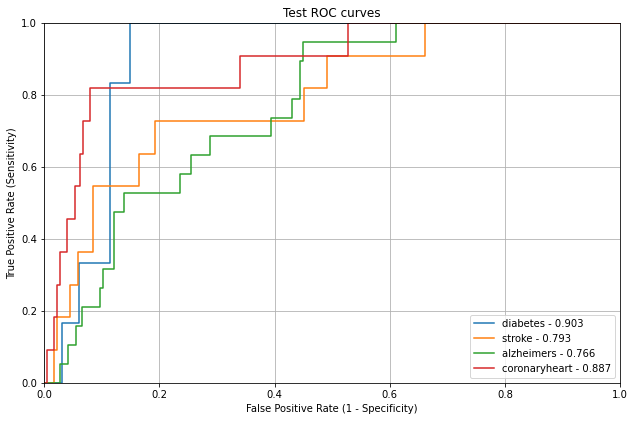

In [ ]:
cnn_base.predict()